This will be done by using a svm model. 

the data will be survived, pclass, sex, age, fare, ticket

Importing Libaries 

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import itertools
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score
from sklearn.model_selection import cross_val_score

In [2]:
train_file = pd.read_csv("./kaggle/train.csv")
test_file = pd.read_csv("./kaggle/test.csv")
submission_file = pd.read_csv("./kaggle/gender_submission.csv")

Checking data and dropping data that is not numerical values 

In [3]:
train_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_file.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df = train_file[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
test_df = test_file[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
X = train_df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
Y = train_file['Survived']

Pre-processing

In [6]:
X.loc[:, 'Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X.loc[:, 'Age'] = X['Age'].fillna(X['Age'].median())
X.loc[:, 'Fare'] = X['Fare'].fillna(X['Fare'].median())
X.loc[:, 'Embarked'] = X['Embarked'].fillna('S')  
X.loc[:, 'Embarked'] = X['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [7]:
test_df.loc[:, 'Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df.loc[:, 'Age'] = test_df['Age'].fillna(X['Age'].median())
test_df.loc[:, 'Fare'] = test_df['Fare'].fillna(X['Fare'].median())
test_df.loc[:, 'Embarked'] = test_df['Embarked'].fillna('S')  
test_df.loc[:, 'Embarked'] = test_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [8]:
X = np.asanyarray(X)
X[0:5]

array([[3, 0, 22.0, 7.25, 2],
       [1, 1, 38.0, 71.2833, 0],
       [3, 1, 26.0, 7.925, 2],
       [1, 1, 35.0, 53.1, 2],
       [3, 0, 35.0, 8.05, 2]], dtype=object)

In [9]:
test_df = np.asanyarray(test_df)
test_df[0:5]

array([[3, 0, 34.5, 7.8292, 1],
       [3, 1, 47.0, 7.0, 2],
       [2, 0, 62.0, 9.6875, 1],
       [3, 0, 27.0, 8.6625, 2],
       [3, 1, 22.0, 12.2875, 2]], dtype=object)

Train/test

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=41)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 5) (712,)
Test set: (179, 5) (179,)


Modeling SVM

In [11]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 

SVC(kernel='linear')

In [12]:
yhat = clf.predict(X_test)
yhat 

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0])

In [13]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import f1_score

# # Try multiple random states and keep track of performance
# best_random_state = None
# best_f1_score = 0

# for state in range(0, 50):  # You can try more or less random states
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=state)
    
#     clf.fit(X_train, y_train)
#     yhat = clf.predict(X_test)
    
#     f1 = f1_score(y_test, yhat, average='weighted')
#     print(f"Random State: {state}, F1-score: {f1:.4f}")
    
#     if f1 > best_f1_score:
#         best_f1_score = f1
#         best_random_state = state

# print(f"Best Random State: {best_random_state}, Best F1-score: {best_f1_score:.4f}")

Evaluation

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       105
           1       0.87      0.72      0.79        74

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.84      0.84      0.83       179

Confusion matrix, without normalization
[[97  8]
 [21 53]]


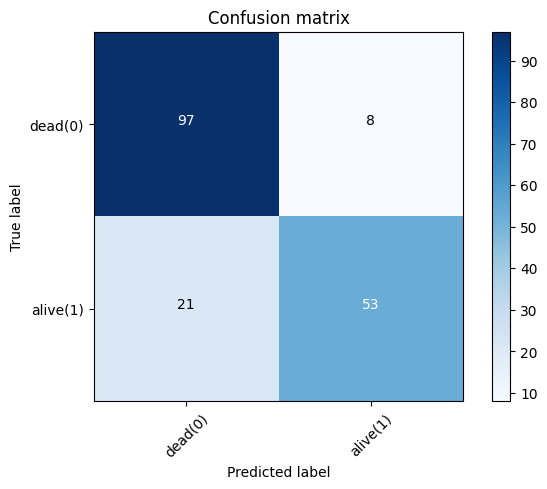

In [15]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['dead(0)','alive(1)'],normalize= False,  title='Confusion matrix')

In [16]:
f1_score(y_test, yhat, average='weighted') 

0.8349105876174543

In [17]:
jaccard_score(y_test, yhat)

0.6463414634146342

In [18]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2))

Avg F1-score: 0.8349
Jaccard score: 0.6463


In [19]:
kaggle_predictions = clf2.predict(test_df)

submission = pd.DataFrame({
    'PassengerId': test_file['PassengerId'],
    'Survived': kaggle_predictions
})

submission.to_csv('svm_titanic_submission.csv', index=False)

In [20]:
# Perform 5-fold cross-validation
scores = cross_val_score(clf2, X, Y, cv=5, scoring='f1_weighted')

# Print the average score across all folds
print("Cross-validated F1-score: %.4f" % scores.mean())

Cross-validated F1-score: 0.7846


In [21]:
clf3 = svm.SVC(kernel='rbf')
clf3.fit(X_train, y_train) 
yhat3 = clf3.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat3, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat3))

Avg F1-score: 0.6229
Jaccard score: 0.2683


In [22]:
# Perform 5-fold cross-validation
scores = cross_val_score(clf3, X, Y, cv=5, scoring='f1_weighted')

# Print the average score across all folds
print("Cross-validated F1-score: %.4f" % scores.mean())

Cross-validated F1-score: 0.6324


In [23]:
clf4 = svm.SVC(kernel='sigmoid')
clf4.fit(X_train, y_train) 
yhat4 = clf4.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat4, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat4))

Avg F1-score: 0.6235
Jaccard score: 0.3619


In [24]:
# Perform 5-fold cross-validation
scores = cross_val_score(clf4, X, Y, cv=5, scoring='f1_weighted')

# Print the average score across all folds
print("Cross-validated F1-score: %.4f" % scores.mean())

Cross-validated F1-score: 0.5809


In [25]:
clf5 = svm.SVC(kernel='poly')
clf5.fit(X_train, y_train) 
yhat5 = clf5.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat5, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat5))

Avg F1-score: 0.5404
Jaccard score: 0.1316


In [26]:
# Perform 5-fold cross-validation
scores = cross_val_score(clf5, X, Y, cv=5, scoring='f1_weighted')

# Print the average score across all folds
print("Cross-validated F1-score: %.4f" % scores.mean())

Cross-validated F1-score: 0.5617
